<a href="https://colab.research.google.com/github/NandaYudhaPratama/Data/blob/main/AP_F1_3_Variabel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Importing the dataset
d = pd.read_csv('https://github.com/NandaYudhaPratama/Data/raw/main/WLC-AP-F1-v2.csv')
#Choose variable 
X = d.iloc[:, [8, 9, 10]].values

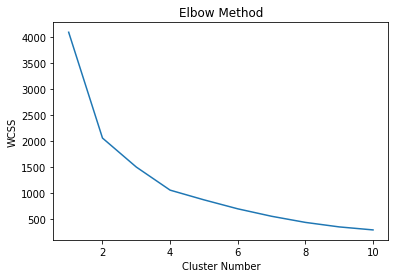

In [ ]:
#Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Cluster Number')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 10)

#Returns a label for each data point based on the number of clusters
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 0 2 0 3 0 2 0 2 1 3 1 1 1 1 1 2 1 2 1 3
 1 2 1 3 1 1 1 2 1 1 1 2 0 2 0 3 0 3 0 3 0 2 0 1 1 1 1 2 1 3 1 2 1 3 1 1 1
 0 1 3 1 3 1 1 1 1 1 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 2 2 2
 2 2 2 2 2 2 2 2 2 3 0 2 0 2 0 2 0 2 0 2 0 1 1 2 1 1 1 1 1 2 1 1 1 2 0 2 0
 1 1 1 1 2 1 2 0 3 0 2 0 3 0 2 0 2 0 2 0 2 1 2 1 3 1 1 1 1 1 1 1 0 1 0 1 3
 1 2 1 1 1 3 1 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


,Name-AP,Time,Frekuensi(Ghz),Channels,Transmit-Power(dBm),Noise,Interference,cluster
0,AP-F1-1-1-3-R.105,10:00,"2,4",13,17,-94,0.10,2
1,AP-F1-1-1-3-R.105,10:00,5,149,20,-92,0.05,2
2,AP-F1-1-1-3-R.105,10:10,"2,4",13,17,-94,0.14,2
3,AP-F1-1-1-3-R.105,10:10,5,149,20,-92,0.05,2
4,AP-F1-1-1-3-R.105,10:20,"2,4",13,17,-94,0.11,2
...,...,...,...,...,...,...,...,...
211,AP-F1-2-3-R.KuliahTE,15:30,5,149,20,-92,0.02,2
212,AP-F1-2-3-R.KuliahTE,15:40,"2,4",8,17,-87,0.15,3
213,AP-F1-2-3-R.KuliahTE,15:40,5,149,20,-92,0.03,2
214,AP-F1-2-3-R.KuliahTE,15:50,"2,4",8,17,-90,0.10,3


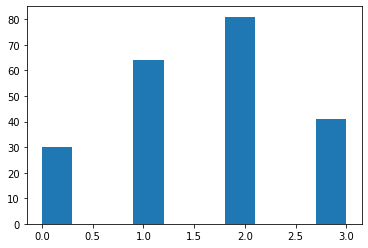

In [ ]:
#Add cluster column
d['cluster'] = y_kmeans
df = d[['Name-AP','Time','Frekuensi(Ghz)','Channels','Transmit-Power(dBm)','Noise','Interference','cluster']]

#Histogram of the amount of data in the cluster
plt.hist(df['cluster'])
df

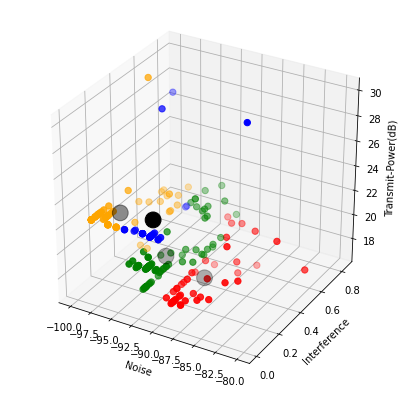

Centroid 
 [[ 2.37000000e+01 -9.15666667e+01  6.80000000e-02]
 [ 2.21250000e+01 -9.74375000e+01  1.94375000e-01]
 [ 1.89876543e+01 -9.28395062e+01  2.57654321e-01]
 [ 1.76829268e+01 -8.87317073e+01  2.99024390e-01]]


In [ ]:
#Visualization
fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')

ax.scatter(X[y_kmeans == 0, 1],X[y_kmeans == 0, 2],X[y_kmeans == 0, 0],c='blue',s=40, label = 'Cluster 1')
ax.scatter(X[y_kmeans == 1, 1],X[y_kmeans == 1, 2],X[y_kmeans == 1, 0],c='orange',s=40, label = 'Cluster 2')
ax.scatter(X[y_kmeans == 2, 1],X[y_kmeans == 2, 2],X[y_kmeans == 2, 0],c='green',s=40, label = 'Cluster 3')
ax.scatter(X[y_kmeans == 3, 1],X[y_kmeans == 3, 2],X[y_kmeans == 3, 0],c='red',s=40, label = 'Cluster 4')
ax.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,0],c='black', s=250,label='Centroids',)

ax.set(title='', xlabel='Noise', ylabel='Interference', zlabel='Transmit-Power(dB)')
plt.show()

print('Centroid \n', kmeans.cluster_centers_)

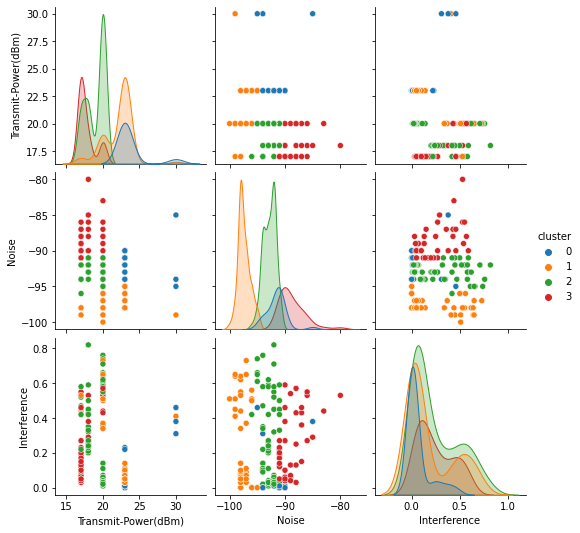

In [ ]:
import seaborn as sns
# Plot the data
sns.pairplot(df,hue='cluster', vars=['Transmit-Power(dBm)','Noise','Interference'], palette='tab10')
